In [1]:
import os
import cv2

# 데이터 디렉토리 경로
base_directory = './data'

# 사용할 카테고리 폴더 이름 리스트
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 
                  'metal', 'paper', 'plastic', 'shoes', 'trash']

# 각 카테고리 폴더 순회
for category_name in category_names:
    # 카테고리 폴더 경로
    category_directory = os.path.join(base_directory, category_name)
    
    # 카테고리 폴더 내 첫 번째 이미지 파일 경로
    file_list = os.listdir(category_directory)
    image_path = os.path.join(category_directory, file_list[0])

    # 이미지 읽기 (OpenCV 사용)
    recycle = cv2.imread(image_path)

    if recycle is not None:
        # BGR 이미지를 grayscale로 변환
        gray_recycle = cv2.cvtColor(recycle, cv2.COLOR_BGR2GRAY)

        # 변환된 이미지 크기 출력 (grayscale 이미지는 채널이 없으므로 2개의 값만 출력됩니다)
        print(f"{category_name} 카테고리의 이미지 크기: {gray_recycle.shape}")  # (높이, 너비)
        
        # 여기서부터는 gray_img 변수를 이용한 후속 작업 수행
        # 예를 들어, 이미지 처리, 표시 등
    


battery 카테고리의 이미지 크기: (183, 275)
biological 카테고리의 이미지 크기: (192, 262)
cardboard 카테고리의 이미지 크기: (474, 474)
clothes 카테고리의 이미지 크기: (534, 400)
glass 카테고리의 이미지 크기: (277, 182)
metal 카테고리의 이미지 크기: (355, 474)
paper 카테고리의 이미지 크기: (384, 512)
plastic 카테고리의 이미지 크기: (384, 512)
shoes 카테고리의 이미지 크기: (275, 183)
trash 카테고리의 이미지 크기: (384, 512)


In [2]:
image_counts = []

# 각 카테고리 폴더 순회
for category_name in category_names:
    # 카테고리 폴더 경로
    category_directory = os.path.join(base_directory, category_name)
    
    # 카테고리 폴더 내 이미지 파일 개수
    file_list = os.listdir(category_directory)
    num_images = len(file_list)
    
    # 이미지 수 리스트에 추가
    image_counts.append(num_images)

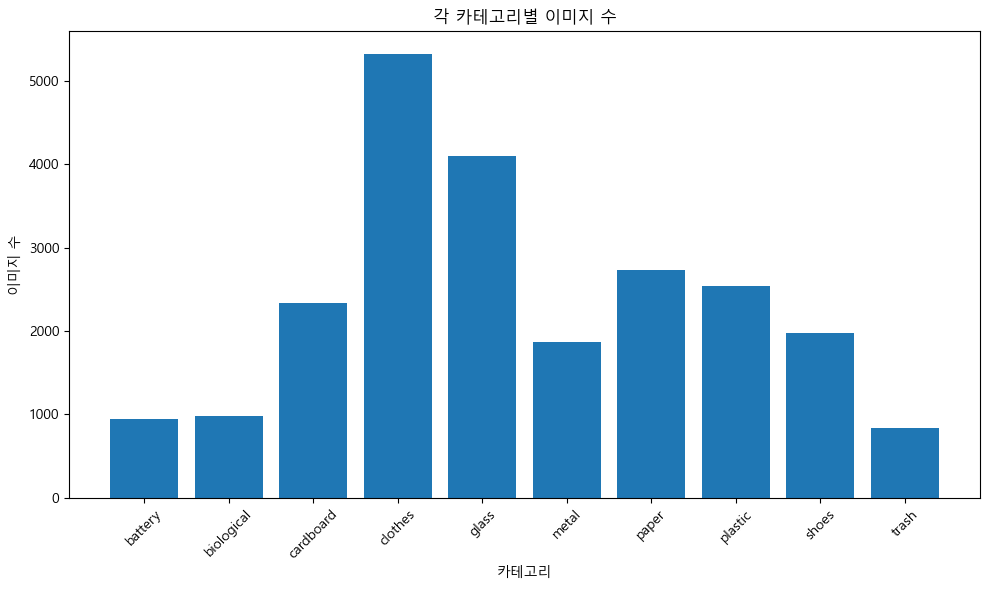

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 카테고리 이름과 이미지 수를 바 그래프로 표시
plt.figure(figsize=(10, 6))
plt.bar(category_names, image_counts)
plt.xlabel('카테고리')
plt.ylabel('이미지 수')
plt.title('각 카테고리별 이미지 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
import cv2
import os
# 데이터 디렉토리 경로
base_directory = './data'
# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
# 일관된 정사각형 크기 설정 (534x534)
target_size = (534, 534)
# 처리된 이미지를 저장할 폴더 경로
output_base_directory = './data_gray'
# 처리된 이미지를 저장할 폴더가 존재하지 않으면 생성
if not os.path.exists(output_base_directory):
    os.makedirs(output_base_directory)
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    output_category_directory = os.path.join(output_base_directory, category_name)
    # 카테고리 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_category_directory):
        os.makedirs(output_category_directory)
    file_list = os.listdir(category_directory)
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        # 이미지 읽기 (OpenCV 사용)
        image = cv2.imread(image_path)
        # 그레이스케일 변환
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # 현재 이미지 크기
        h, w = gray_image.shape
        # 정사각형 패딩 계산
        if h > w:
            diff = h - w
            pad_left = diff // 2
            pad_right = diff - pad_left
            pad_top, pad_bottom = 0, 0
        else:
            diff = w - h
            pad_top = diff // 2
            pad_bottom = diff - pad_top
            pad_left, pad_right = 0, 0
        # BORDER_REPLICATE를 사용하여 패딩 추가
        padded_image = cv2.copyMakeBorder(
            gray_image,
            pad_top, pad_bottom,
            pad_left, pad_right,
            cv2.BORDER_REPLICATE
        )
        # 패딩 후 리사이즈
        resized_image = cv2.resize(padded_image, target_size)
        # 처리된 이미지 저장
        output_path = os.path.join(output_category_directory, f'gray_resized_{file_name}')
        cv2.imwrite(output_path, resized_image)
        print(f"처리된 이미지가 저장되었습니다: {output_path}")

처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_1.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_10.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_100.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_101.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_102.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_103.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_104.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_105.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_106.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_107.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_108.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_109.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_11.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_110.jpg
처리된 이미지가 저장되었습니다: ./data_gray\battery\gray_resized_battery_111.jpg

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [40]:
import cv2
import os
# 데이터 디렉토리 경로
base_directory = './data'
# 사용할 카테고리 폴더 이름
category_names = ['shoes', 'trash']
# 일관된 정사각형 크기 설정 (534x534)
target_size = (534, 534)
# 처리된 이미지를 저장할 폴더 경로
output_base_directory = './data_gray'
# 처리된 이미지를 저장할 폴더가 존재하지 않으면 생성
if not os.path.exists(output_base_directory):
    os.makedirs(output_base_directory)
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    output_category_directory = os.path.join(output_base_directory, category_name)
    # 카테고리 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_category_directory):
        os.makedirs(output_category_directory)
    file_list = os.listdir(category_directory)
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        # 이미지 읽기 (OpenCV 사용)
        image = cv2.imread(image_path)
        # 그레이스케일 변환
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # 현재 이미지 크기
        h, w = gray_image.shape
        # 정사각형 패딩 계산
        if h > w:
            diff = h - w
            pad_left = diff // 2
            pad_right = diff - pad_left
            pad_top, pad_bottom = 0, 0
        else:
            diff = w - h
            pad_top = diff // 2
            pad_bottom = diff - pad_top
            pad_left, pad_right = 0, 0
        # BORDER_REPLICATE를 사용하여 패딩 추가
        padded_image = cv2.copyMakeBorder(
            gray_image,
            pad_top, pad_bottom,
            pad_left, pad_right,
            cv2.BORDER_REPLICATE
        )
        # 패딩 후 리사이즈
        resized_image = cv2.resize(padded_image, target_size)
        # 처리된 이미지 저장
        output_path = os.path.join(output_category_directory, f'gray_resized_{file_name}')
        cv2.imwrite(output_path, resized_image)
        print(f"처리된 이미지가 저장되었습니다: {output_path}")

처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_10.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_100.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1000.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1001.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1002.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1003.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1004.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1005.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1006.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1007.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1008.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1009.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_101.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resized_shoes_1010.jpg
처리된 이미지가 저장되었습니다: ./data_gray\shoes\gray_resize

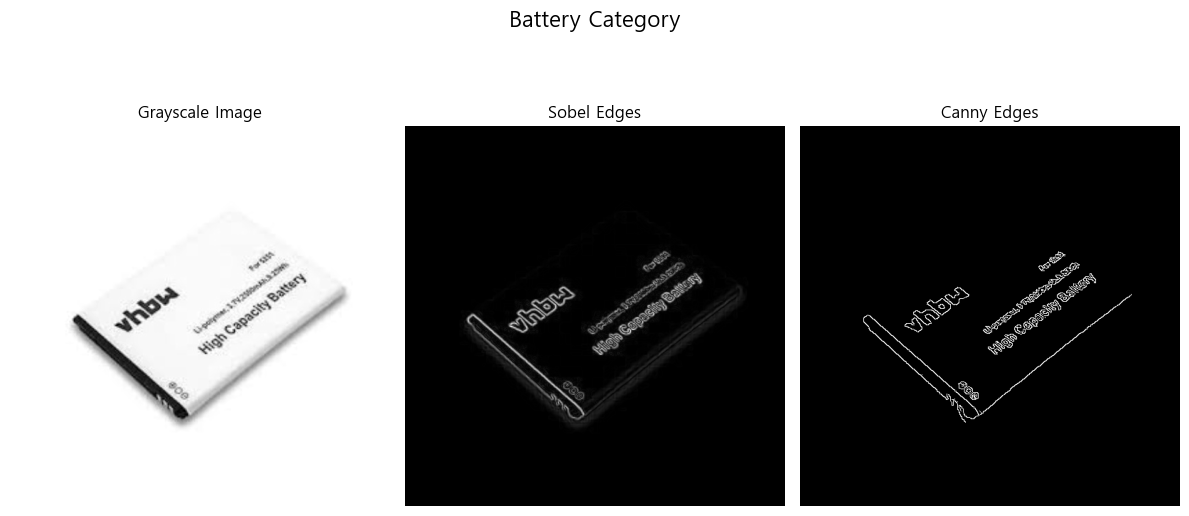

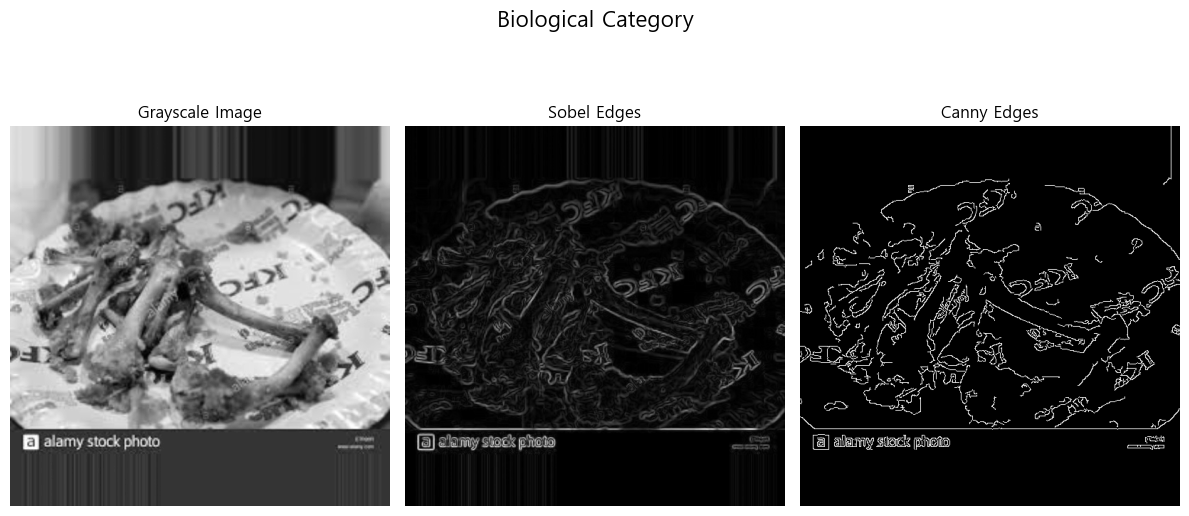

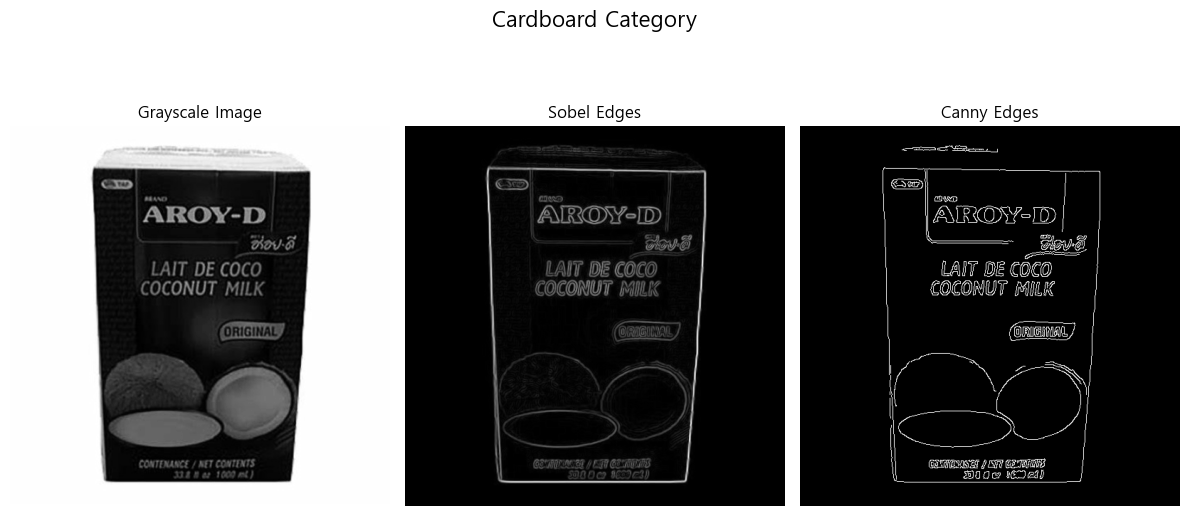

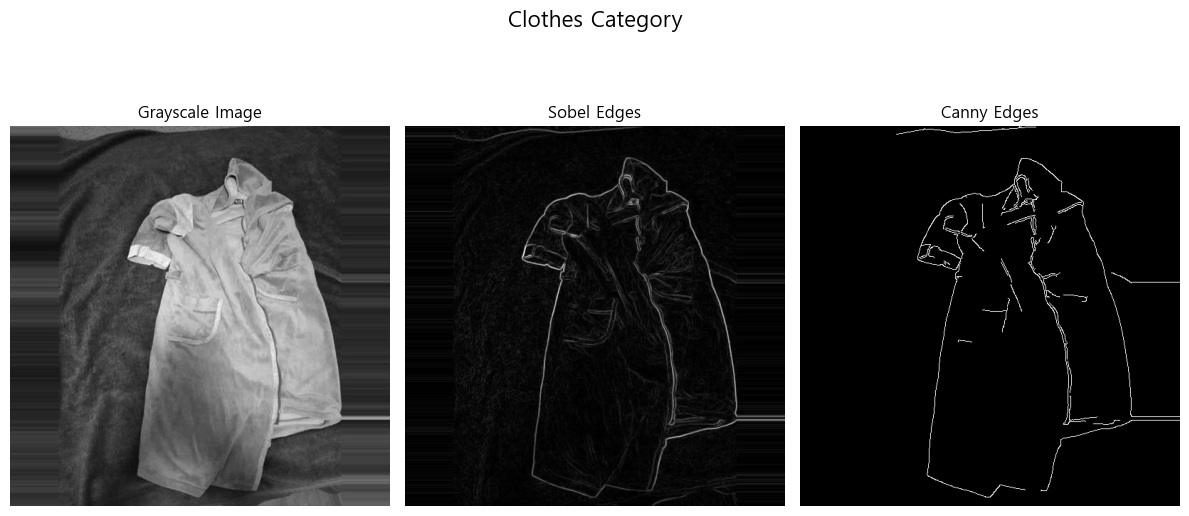

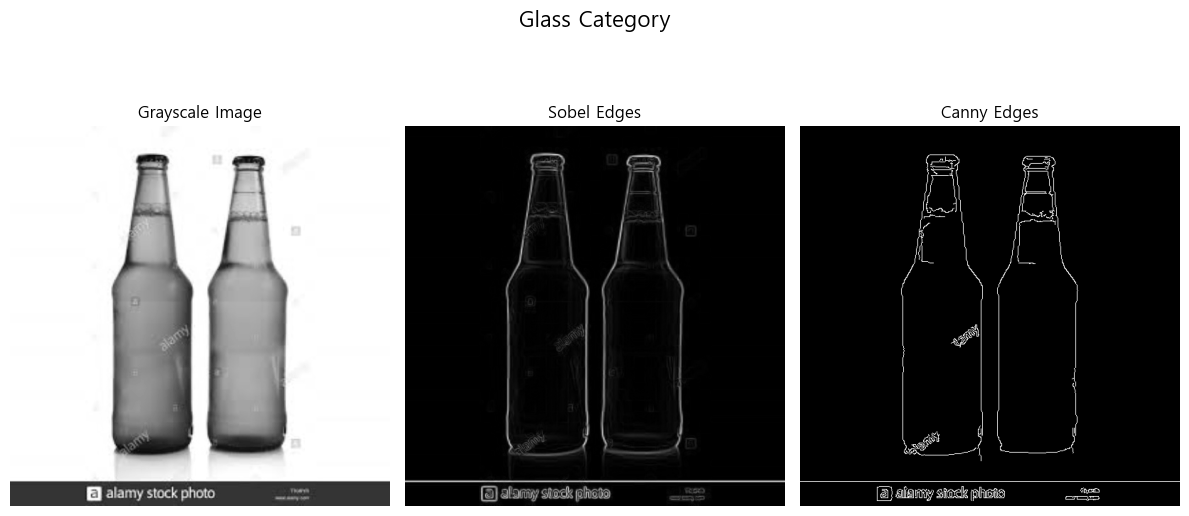

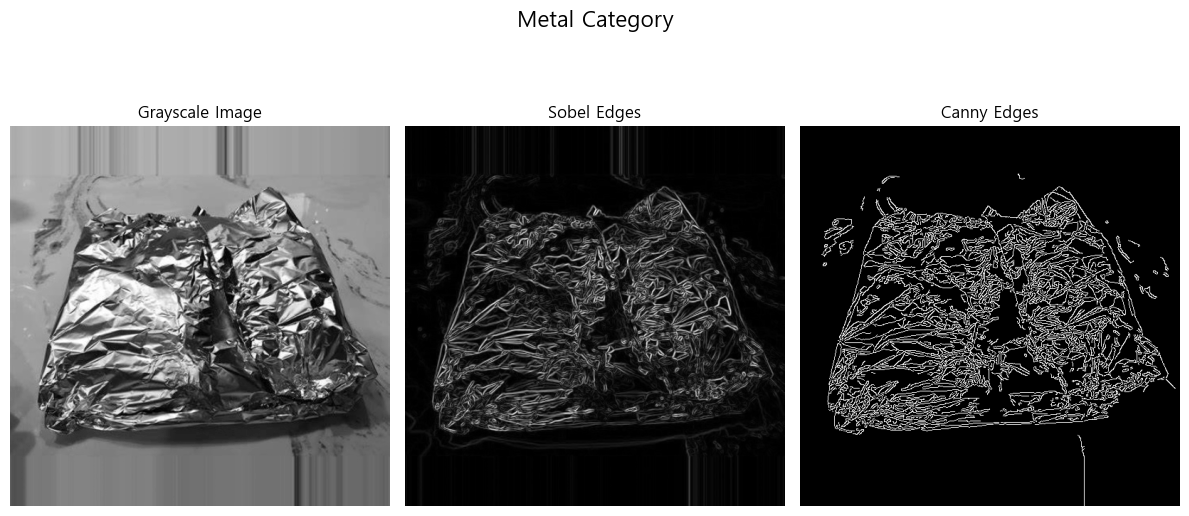

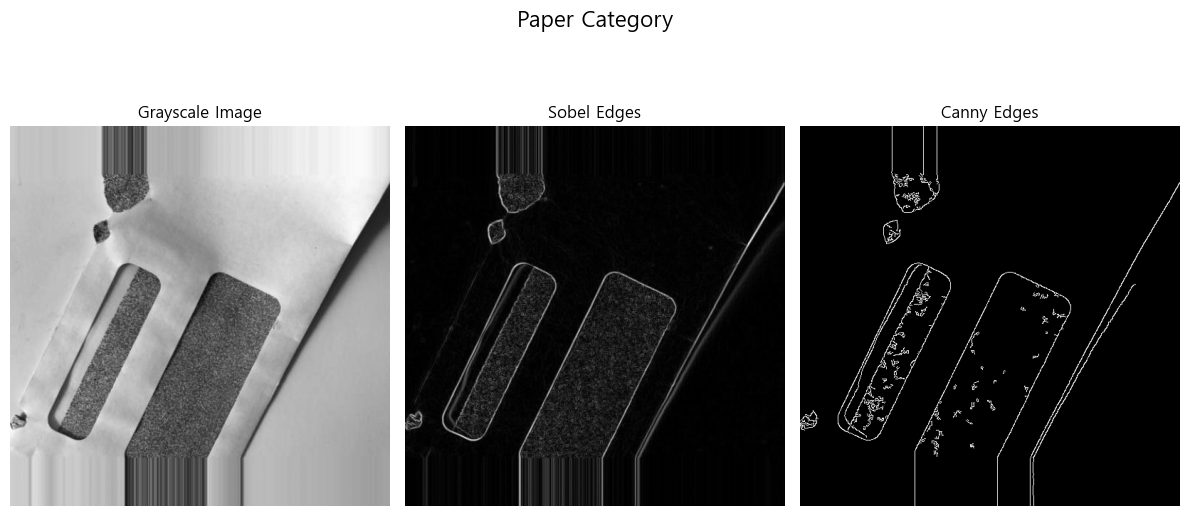

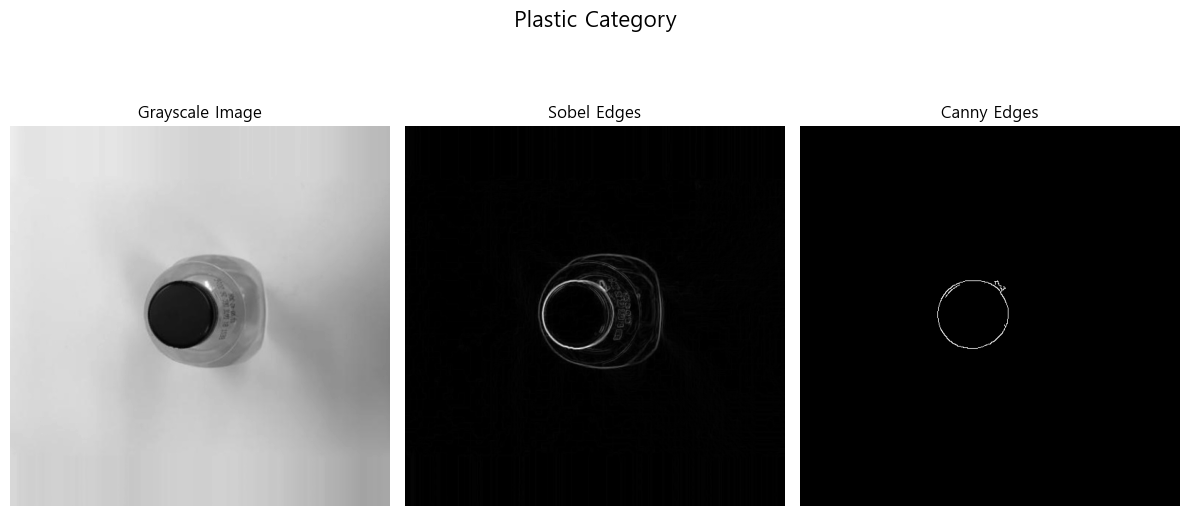

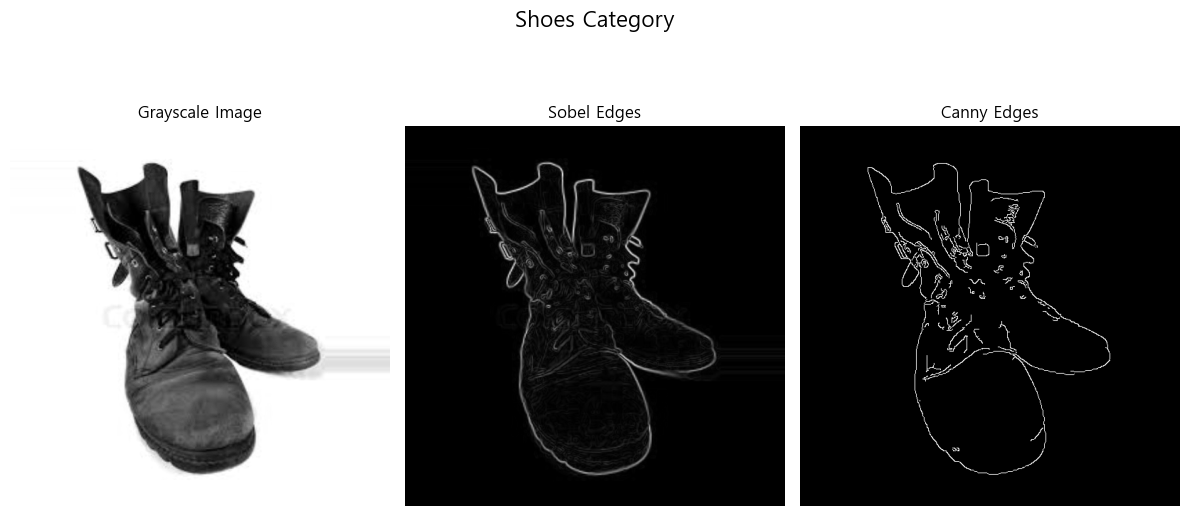

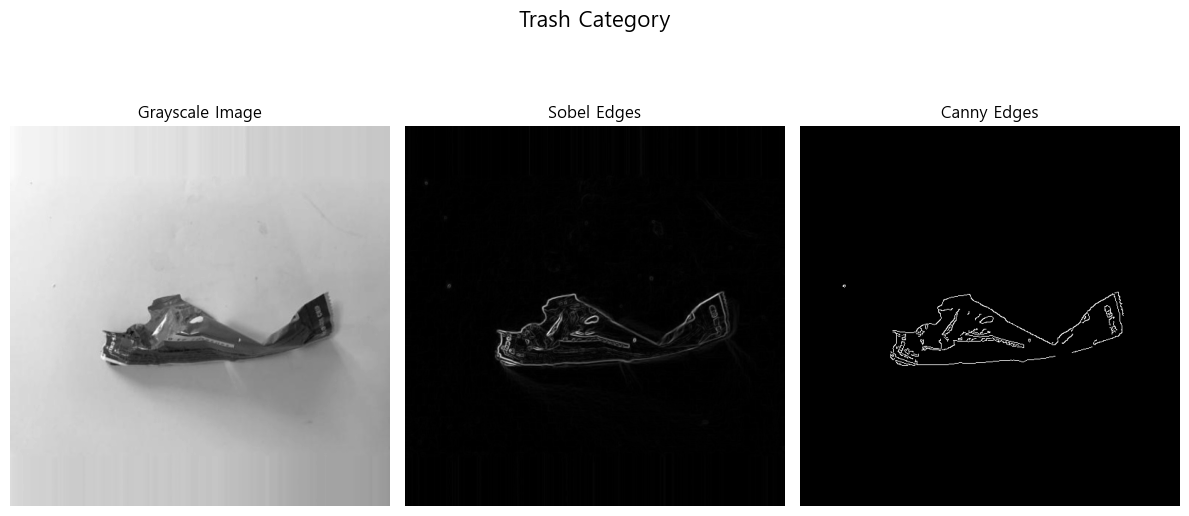

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로
base_directory = './data_gray'

# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 
                  'metal', 'paper', 'plastic', 'shoes', 'trash']

# 각 카테고리 폴더를 순회하면서 처리
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    
    # 카테고리 폴더 내 첫 번째 이미지 파일 경로
    file_list = os.listdir(category_directory)
    image_path = os.path.join(category_directory, file_list[0])
    
    # 이미지 읽기 (OpenCV 사용)
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Sobel 에지 검출
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    
    # Canny 에지 검출
    canny_threshold1 = 100
    canny_threshold2 = 250
    canny_edges = cv2.Canny(gray_image, canny_threshold1, canny_threshold2)
    
    # 이미지 및 에지 결과 출력
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edges')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')
    
    plt.suptitle(f'{category_name.capitalize()} Category', fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
# 소벨 Sobel 사용

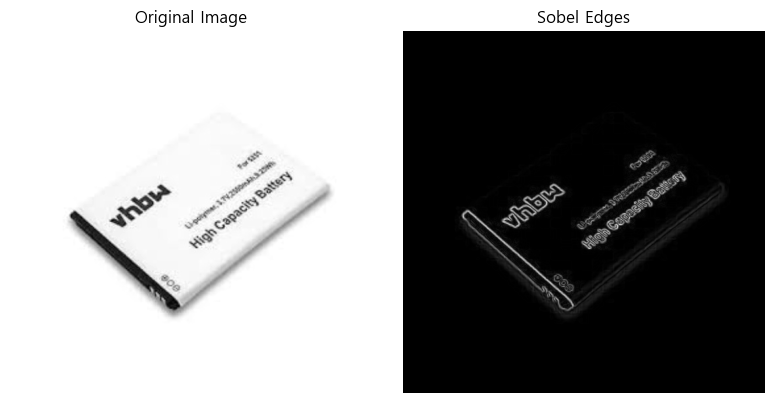

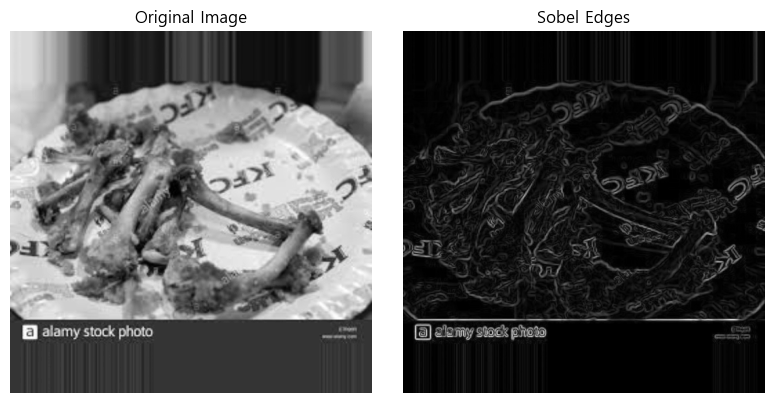

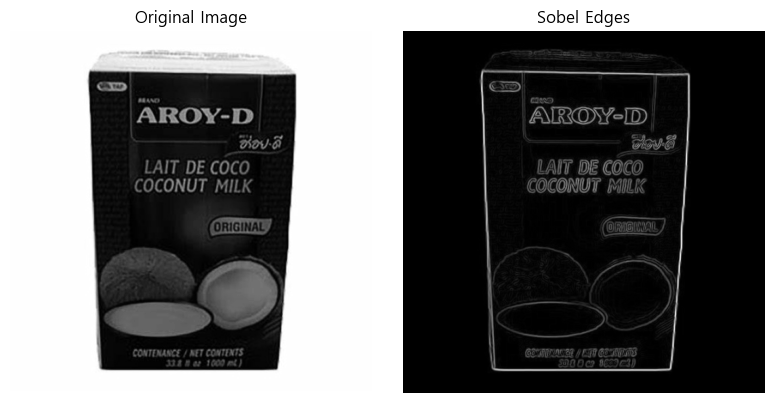

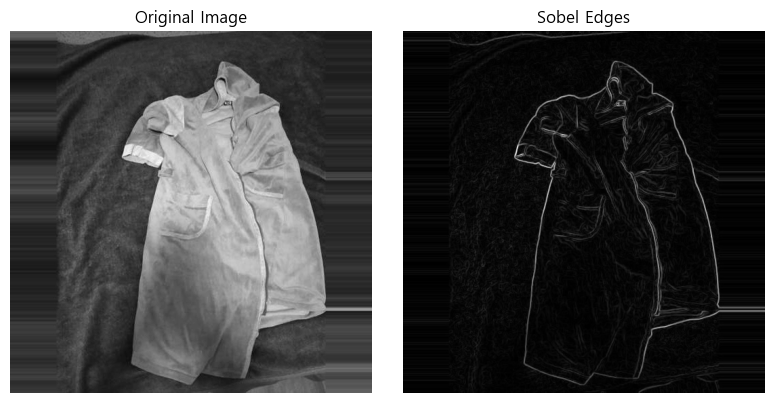

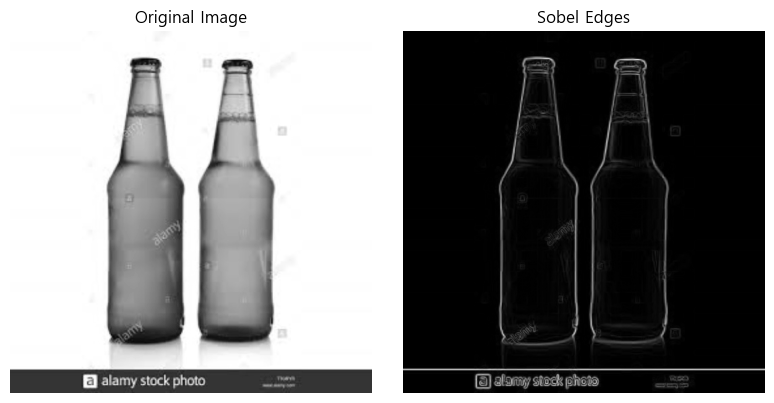

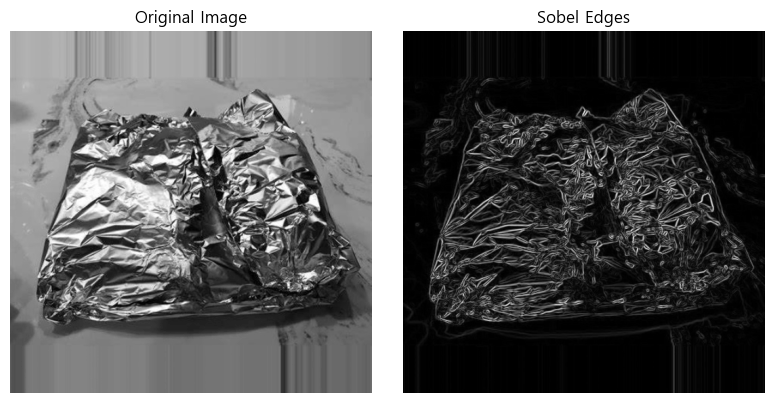

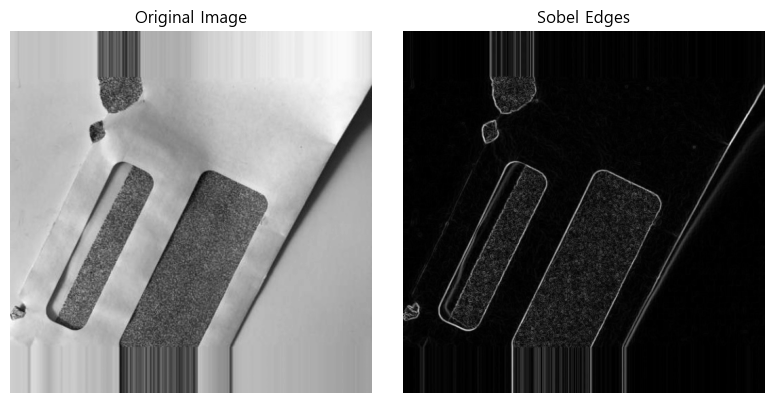

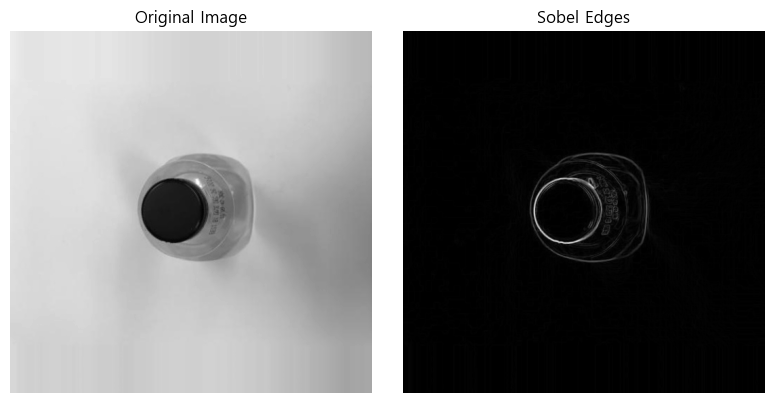

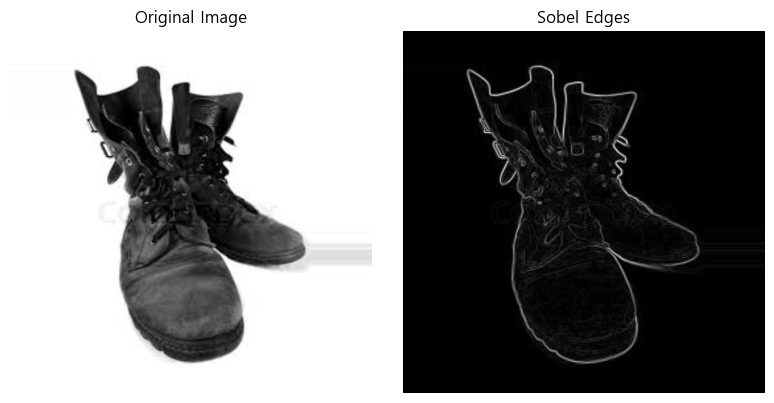

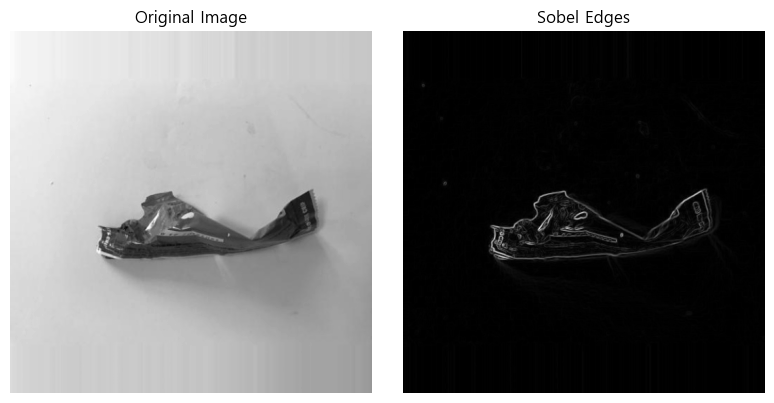

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로
base_directory = './data_gray'

# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 
                  'metal', 'paper', 'plastic', 'shoes', 'trash']

# 각 카테고리마다 하나의 이미지에 Sobel 연산 적용
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    file_list = os.listdir(category_directory)
    image_path = os.path.join(category_directory, file_list[0])  # 첫 번째 이미지 선택
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Sobel 연산 적용
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    
    # 변수명 변경
    recycle_sobel = sobel_edges
    
    # 이미지와 Sobel 연산 결과를 표시
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Sobel Edges')
    plt.imshow(recycle_sobel, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

In [7]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print("CUDA(GPU)를 사용합니다.")
  
else:
  device = torch.device("cpu")
  print("CUDA(GPU)를 사용할 수 없으므로, CPU를 사용합니다.")

CUDA(GPU)를 사용합니다.


# sobel

In [18]:
import cv2
import os

# 데이터 디렉토리 경로
base_directory = './data_gray'

# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 
                  'metal', 'paper', 'plastic', 'shoes', 'trash']

# 결과를 저장할 폴더 경로
output_directory = './sobel_edge_results'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 각 카테고리마다 모든 이미지에 Sobel 연산 적용
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    output_category_directory = os.path.join(output_directory, category_name)
    if not os.path.exists(output_category_directory):
        os.makedirs(output_category_directory)
    
    file_list = os.listdir(category_directory)
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Sobel 연산 적용
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        sobel_edges = cv2.magnitude(sobel_x, sobel_y)
        
        # 결과를 파일로 저장
        output_path = os.path.join(output_category_directory, f'{file_name[:-4]}_sobel_edge.jpg')  # 이미지 확장자 제거 후 저장
        cv2.imwrite(output_path, sobel_edges)
        print(f"Sobel 연산 결과가 저장되었습니다: {output_path}")


Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_1_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_10_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_100_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_101_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_102_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_103_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_104_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_105_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_106_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_107_sobel_edge.jpg
Sobel 연산 결과가 저장되었습니다: ./sobel_edge_results\battery\gray_resized_battery_108_sobel_edge.jpg
So

# canny

In [ ]:
import cv2
import os

# 데이터 디렉토리 경로
base_directory = './data_gray'

# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 
                  'metal', 'paper', 'plastic', 'shoes', 'trash']

# 결과를 저장할 폴더 경로 - Canny 연산 결과
canny_output_directory = './canny_edge_results'
if not os.path.exists(canny_output_directory):
    os.makedirs(canny_output_directory)

# 각 카테고리마다 모든 이미지에 Canny 연산 적용
for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    
    # Canny 연산 결과 저장 폴더
    canny_output_category_directory = os.path.join(canny_output_directory, category_name)
    if not os.path.exists(canny_output_category_directory):
        os.makedirs(canny_output_category_directory)
    
    file_list = os.listdir(category_directory)
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Canny 연산 적용
        canny_edges = cv2.Canny(image, 100, 200)  # 임계값 100, 200 사용
        
        # 결과를 파일로 저장 - Canny 연산 결과
        canny_output_path = os.path.join(canny_output_category_directory, f'{file_name[:-4]}_canny_edge.jpg')
        cv2.imwrite(canny_output_path, canny_edges)
        print(f"Canny 연산 결과가 저장되었습니다: {canny_output_path}")


In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = './sobel_edge_results'
output_dir = './data_gray_split'
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Train, val 폴더 생성
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    
    class_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
        
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))

print("Data splitting completed.")

Data splitting completed.


In [20]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# 데이터 전처리 및 로드
data_transforms = {
    'train': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # 그레이스케일로 변환
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # 그레이스케일 이미지는 평균과 표준편차를 [0.5]로 설정
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

data_dir = './data_gray_split'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive Average Pooling
        self.fc1 = nn.Linear(128, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

num_classes = len(class_names)
model = SimpleCNN(num_classes).to(device)


In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=10)


Epoch 0/9
----------
train Loss: 1.8857 Acc: 0.3467
val Loss: 1.7072 Acc: 0.4013

Epoch 1/9
----------
train Loss: 1.6210 Acc: 0.4394
val Loss: 1.4956 Acc: 0.4766

Epoch 2/9
----------
train Loss: 1.4733 Acc: 0.4930
val Loss: 1.3517 Acc: 0.5399

Epoch 3/9
----------
train Loss: 1.3766 Acc: 0.5309
val Loss: 1.2705 Acc: 0.5661

Epoch 4/9
----------
train Loss: 1.2764 Acc: 0.5658
val Loss: 1.2226 Acc: 0.5845

Epoch 5/9
----------
train Loss: 1.2128 Acc: 0.5870
val Loss: 1.1136 Acc: 0.6382

Epoch 6/9
----------
train Loss: 1.1564 Acc: 0.6070
val Loss: 1.0602 Acc: 0.6443

Epoch 7/9
----------
train Loss: 1.1033 Acc: 0.6280
val Loss: 1.0302 Acc: 0.6561

Epoch 8/9
----------
train Loss: 1.0529 Acc: 0.6435
val Loss: 0.9571 Acc: 0.6717

Epoch 9/9
----------
train Loss: 1.0184 Acc: 0.6546
val Loss: 0.9286 Acc: 0.6922



In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=21):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=21)


Epoch 0/20
----------
train Loss: 0.9858 Acc: 0.6664
val Loss: 0.9327 Acc: 0.6766

Epoch 1/20
----------
train Loss: 0.9515 Acc: 0.6788
val Loss: 0.9538 Acc: 0.6791

Epoch 2/20
----------
train Loss: 0.9243 Acc: 0.6909
val Loss: 0.8397 Acc: 0.7222

Epoch 3/20
----------
train Loss: 0.8889 Acc: 0.6980
val Loss: 0.8879 Acc: 0.7012

Epoch 4/20
----------
train Loss: 0.8750 Acc: 0.7048
val Loss: 0.8507 Acc: 0.7063

Epoch 5/20
----------
train Loss: 0.8454 Acc: 0.7162
val Loss: 0.8355 Acc: 0.7256

Epoch 6/20
----------
train Loss: 0.8156 Acc: 0.7239
val Loss: 0.7904 Acc: 0.7359

Epoch 7/20
----------
train Loss: 0.8000 Acc: 0.7300
val Loss: 0.8259 Acc: 0.7161

Epoch 8/20
----------
train Loss: 0.7789 Acc: 0.7395
val Loss: 0.7278 Acc: 0.7610

Epoch 9/20
----------
train Loss: 0.7592 Acc: 0.7454
val Loss: 0.7319 Acc: 0.7566

Epoch 10/20
----------
train Loss: 0.7400 Acc: 0.7566
val Loss: 0.7262 Acc: 0.7549

Epoch 11/20
----------
train Loss: 0.7250 Acc: 0.7559
val Loss: 0.7041 Acc: 0.7684

Ep

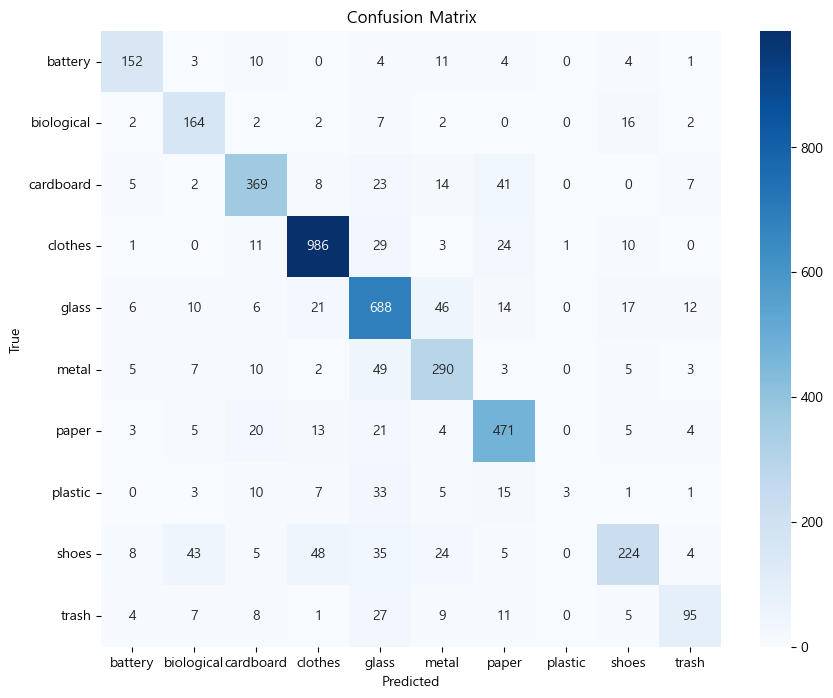

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, dataloader, classes):
    model.eval()
    all_preds = []
    all_labels = []
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
# 혼동 행렬 시각화
plot_confusion_matrix(model, dataloaders['val'], class_names)

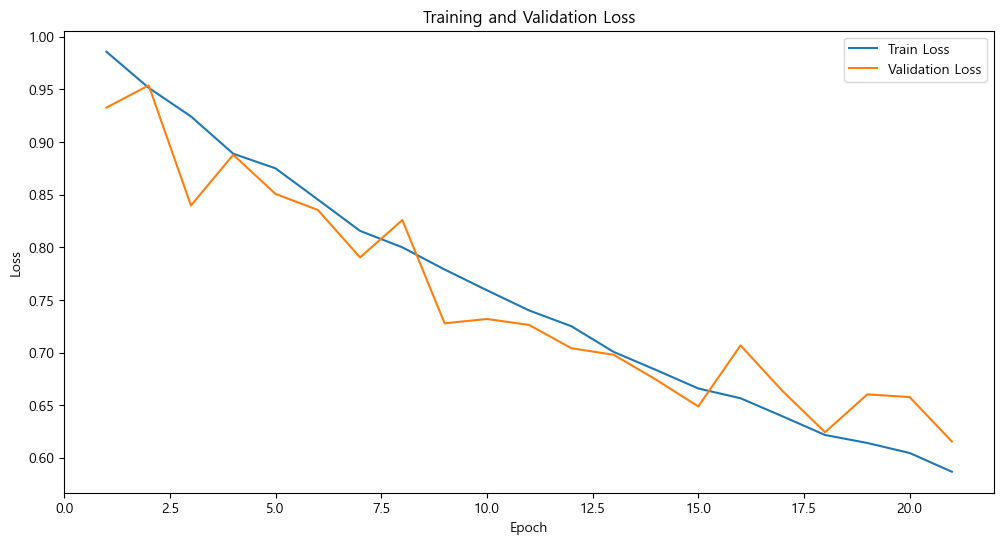

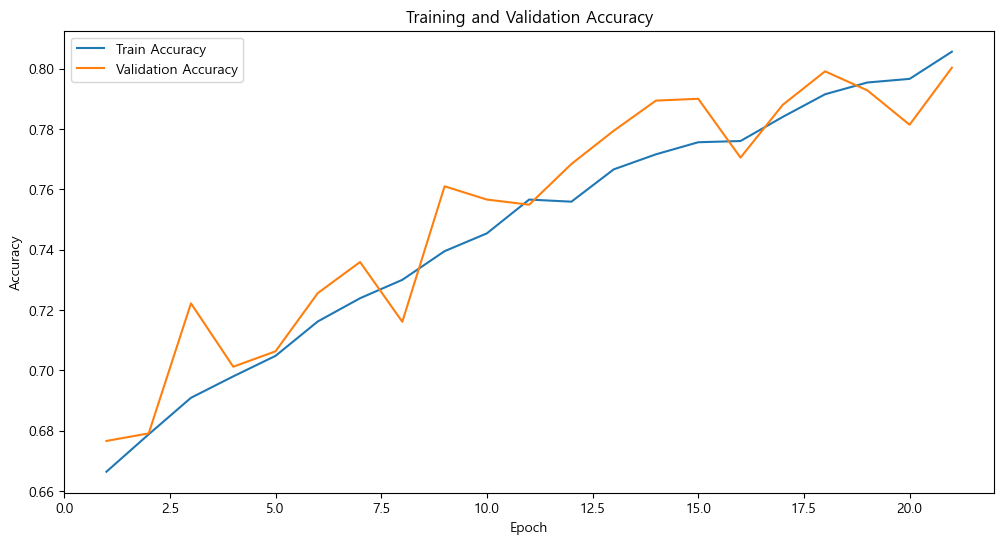

In [27]:
import re
import matplotlib.pyplot as plt

log_text = """
Epoch 0/20
----------
train Loss: 0.9858 Acc: 0.6664
val Loss: 0.9327 Acc: 0.6766

Epoch 1/20
----------
train Loss: 0.9515 Acc: 0.6788
val Loss: 0.9538 Acc: 0.6791

Epoch 2/20
----------
train Loss: 0.9243 Acc: 0.6909
val Loss: 0.8397 Acc: 0.7222

Epoch 3/20
----------
train Loss: 0.8889 Acc: 0.6980
val Loss: 0.8879 Acc: 0.7012

Epoch 4/20
----------
train Loss: 0.8750 Acc: 0.7048
val Loss: 0.8507 Acc: 0.7063

Epoch 5/20
----------
train Loss: 0.8454 Acc: 0.7162
val Loss: 0.8355 Acc: 0.7256

Epoch 6/20
----------
train Loss: 0.8156 Acc: 0.7239
val Loss: 0.7904 Acc: 0.7359

Epoch 7/20
----------
train Loss: 0.8000 Acc: 0.7300
val Loss: 0.8259 Acc: 0.7161

Epoch 8/20
----------
train Loss: 0.7789 Acc: 0.7395
val Loss: 0.7278 Acc: 0.7610

Epoch 9/20
----------
train Loss: 0.7592 Acc: 0.7454
val Loss: 0.7319 Acc: 0.7566

Epoch 10/20
----------
train Loss: 0.7400 Acc: 0.7566
val Loss: 0.7262 Acc: 0.7549

Epoch 11/20
----------
train Loss: 0.7250 Acc: 0.7559
val Loss: 0.7041 Acc: 0.7684

Epoch 12/20
----------
train Loss: 0.7006 Acc: 0.7666
val Loss: 0.6979 Acc: 0.7794

Epoch 13/20
----------
train Loss: 0.6835 Acc: 0.7716
val Loss: 0.6743 Acc: 0.7894

Epoch 14/20
----------
train Loss: 0.6659 Acc: 0.7756
val Loss: 0.6488 Acc: 0.7900

Epoch 15/20
----------
train Loss: 0.6566 Acc: 0.7760
val Loss: 0.7068 Acc: 0.7705

Epoch 16/20
----------
train Loss: 0.6393 Acc: 0.7840
val Loss: 0.6632 Acc: 0.7880

Epoch 17/20
----------
train Loss: 0.6217 Acc: 0.7915
val Loss: 0.6243 Acc: 0.7991

Epoch 18/20
----------
train Loss: 0.6141 Acc: 0.7954
val Loss: 0.6603 Acc: 0.7928

Epoch 19/20
----------
train Loss: 0.6046 Acc: 0.7966
val Loss: 0.6577 Acc: 0.7814

Epoch 20/20
----------
train Loss: 0.5868 Acc: 0.8056
val Loss: 0.6155 Acc: 0.8003
"""

def extract_values_from_log(log_text):
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []
    
    train_loss_matches = re.findall(r'train Loss: ([\d.]+) Acc: ([\d.]+)', log_text)
    val_loss_matches = re.findall(r'val Loss: ([\d.]+) Acc: ([\d.]+)', log_text)
    
    for match in train_loss_matches:
        train_loss.append(float(match[0]))
        train_acc.append(float(match[1]))
    
    for match in val_loss_matches:
        val_loss.append(float(match[0]))
        val_acc.append(float(match[1]))
    
    return train_loss, val_loss, train_acc, val_acc

# 로그에서 값 추출
train_loss_history, val_loss_history, train_acc_history, val_acc_history = extract_values_from_log(log_text)

# 시각화
epochs = list(range(1, len(train_loss_history) + 1))

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 학습 및 검증 정확도 시각화
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc_history, label='Train Accuracy')
plt.plot(epochs, val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

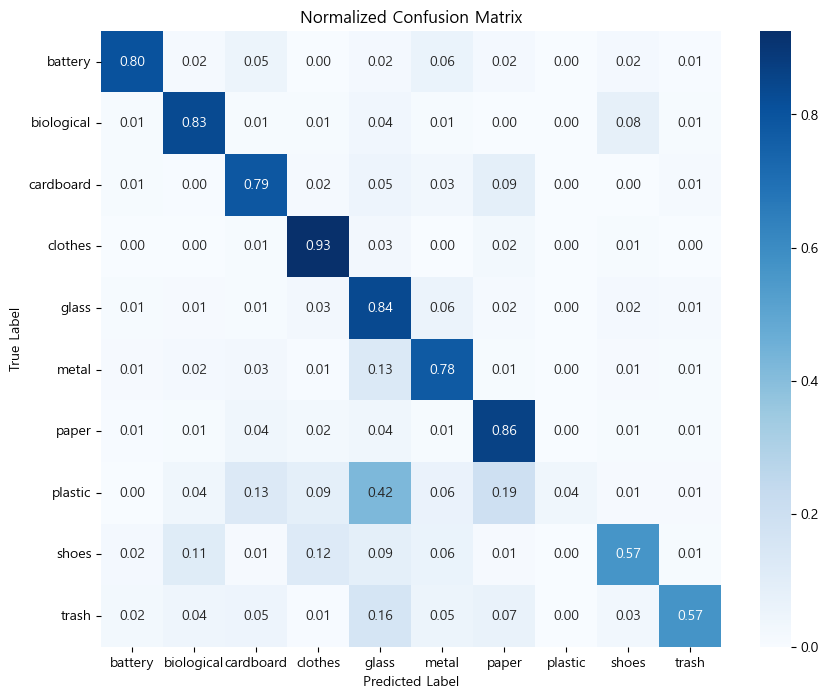

In [28]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 클래스 이름 설정
class_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
# 모델 평가 및 혼동 행렬 계산 함수
def evaluate_model_and_plot_confusion_matrix(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    # 혼동 행렬 계산
    cm = confusion_matrix(all_labels, all_preds)
    # 비율로 변환
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # 혼동 행렬 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix')
    plt.show()
# 검증 데이터셋에 대해 혼동 행렬 계산 및 시각화
evaluate_model_and_plot_confusion_matrix(model, dataloaders['val'], class_names)